# EM Algorithm for Gaussian Mixture Models (GMM)
The Expectation-Maximization (EM) algorithm is a powerful tool for estimating the parameters of statistical models when some of the data is unobserved or missing. In the context of Gaussian Mixture Models (GMMs), the EM algorithm is used to estimate the parameters of multiple Gaussian distributions that may be present in the data.

1. **E-Step (Expectation)**: This is where we compute the **latent probabilities** that each data point belongs to one of the two distributions.
2. **M-Step (Maximization)**: Here, we use the latent probabilities to update the parameters (means and variances) of the two distributions, refining the model to better fit the data.


### Explanation of the Code and the Expectation-Maximization (EM) Algorithm:

1. **Latent Variables**:
   - In this algorithm, **latent probabilities** represent the probability that a data point was generated by either of the two Gaussian distributions.

2. **Initialization**:
   - We initialize two Gaussian distributions with arbitrary means (`mu`) and standard deviations (`sigma`).
   - These initial guesses will be updated in each iteration of the EM algorithm.

3. **E-Step (Expectation Step)**:
   - In this step, we calculate the **latent probabilities**. These are the probabilities that a given data point was generated by Gaussian 1 or Gaussian 2.
   - To calculate this, we compute the probability density of each data point under both Gaussian distributions using the Normal PDF (`norm.pdf`).
   - Then, we normalize these values so that the latent probabilities for each point sum to 1. This step answers the question: "What is the probability that point `x` belongs to Gaussian 1 or Gaussian 2?"

4. **M-Step (Maximization Step)**:
   - Using the latent probabilities calculated in the E-step, we update the parameters (mean and variance) of both Gaussian distributions.
   - The updated **mean** for each Gaussian is a weighted average of the data points, where the weights are the latent probabilities.
   - The **variance** (standard deviation) is also updated by calculating the weighted variance of the data points with respect to the current mean.
   - This step updates the model parameters to maximize the likelihood of the observed data given the latent variable assignments.

5. **Iterations**:
   - The algorithm repeats the E-step and M-step for a predefined number of iterations (5 in this case).
   - After each iteration, the latent probabilities are recalculated based on the updated means and variances, and the means and variances are further refined in the M-step.

6. **Visualization**:
   - After each iteration, a graph is displayed that shows:
     - **Data points** as black dots on the x-axis.
     - **Latent probabilities** for each data point, represented as vertical bars.
     - The **current Gaussian distributions** are plotted as smooth curves in blue and red, corresponding to Gaussian 1 and Gaussian 2, respectively.

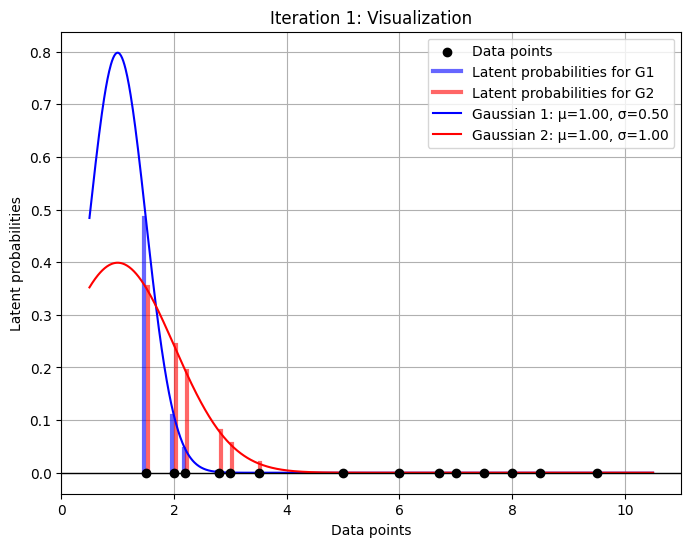

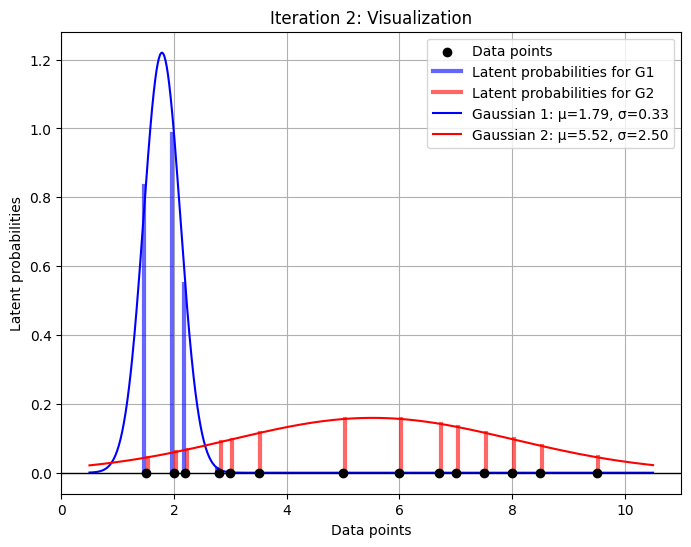

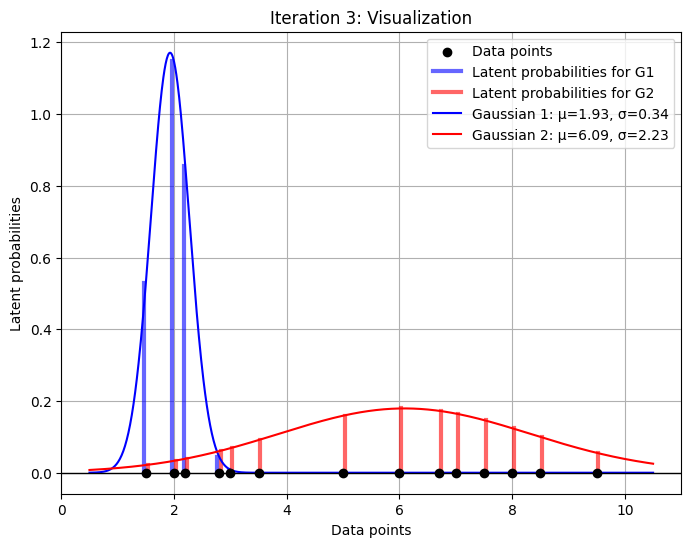

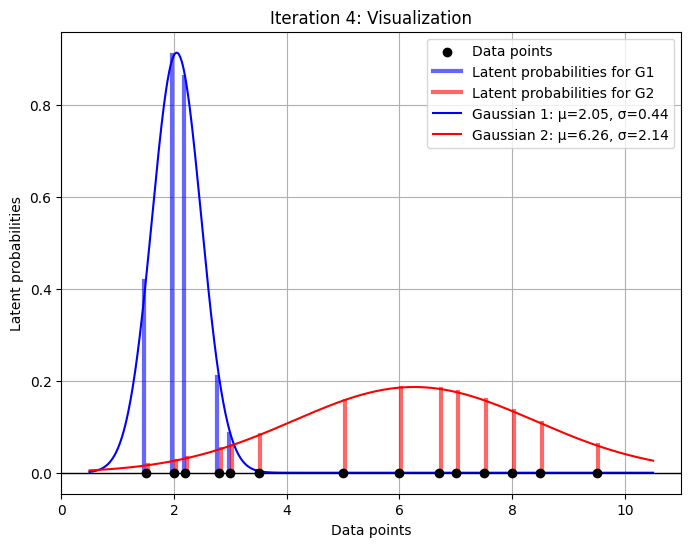

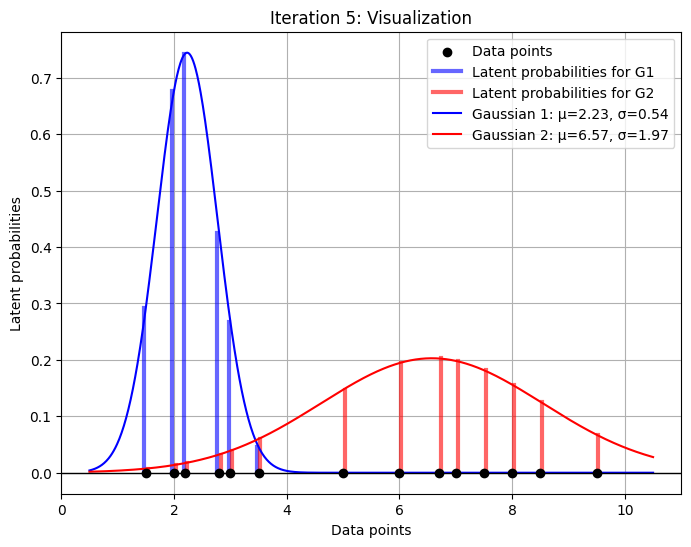

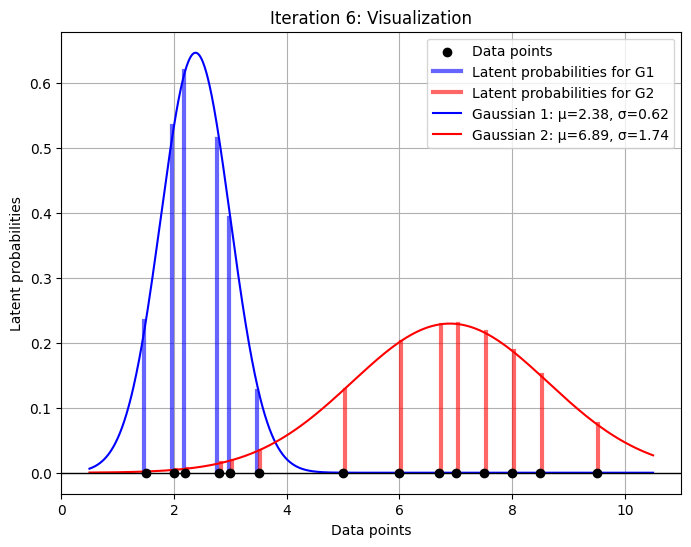

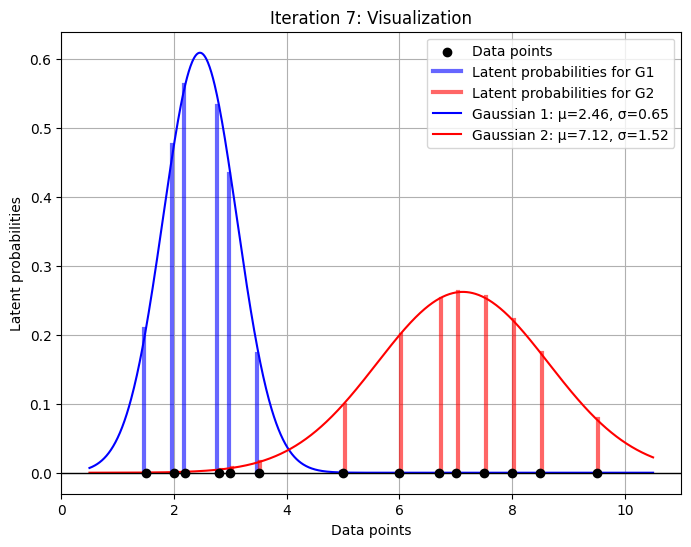

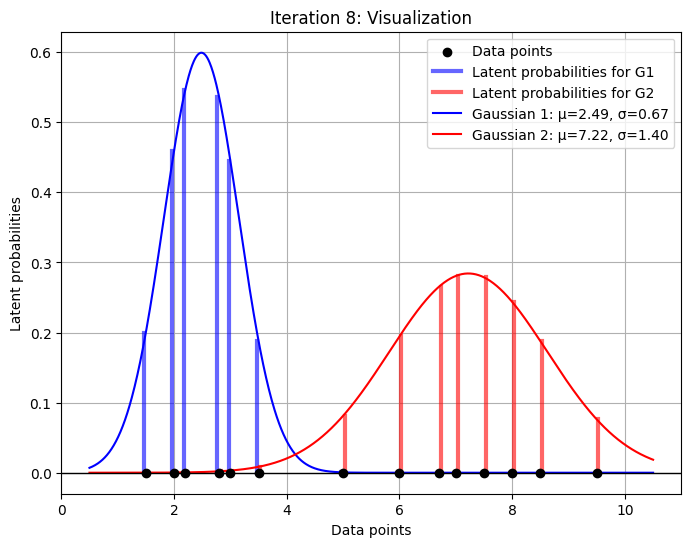

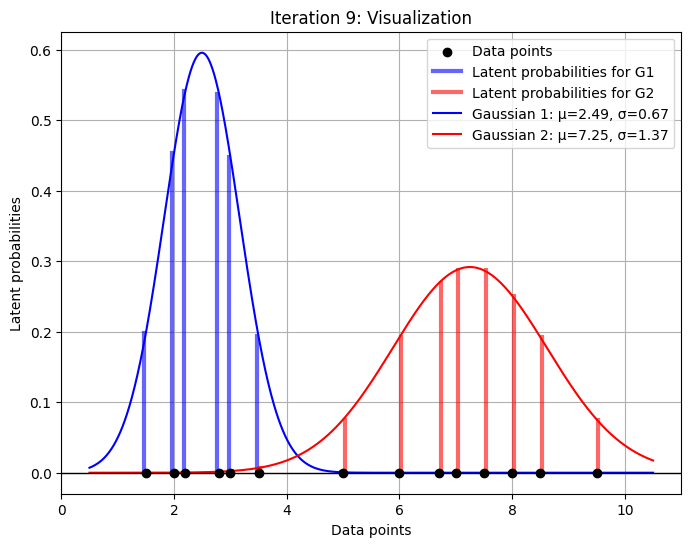

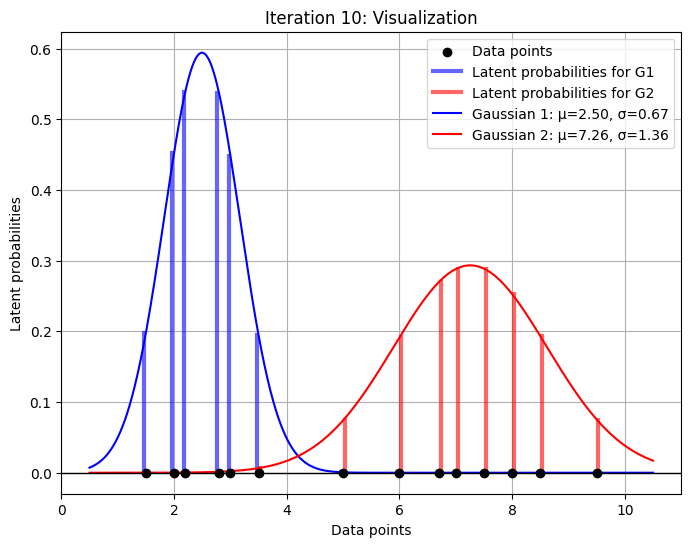

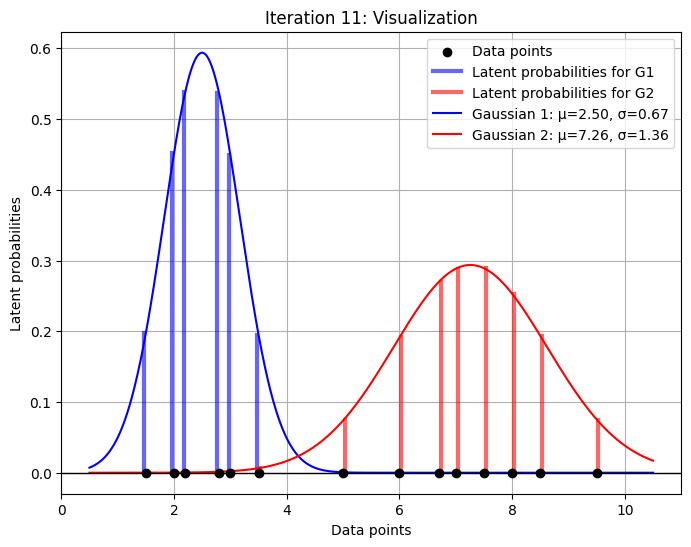

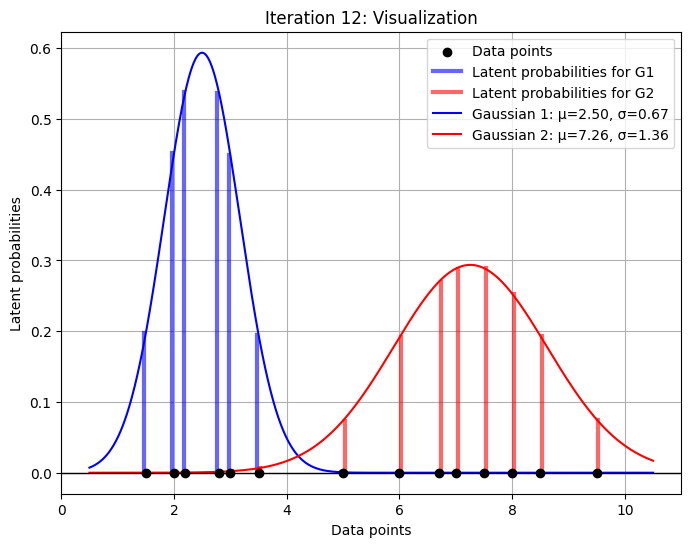

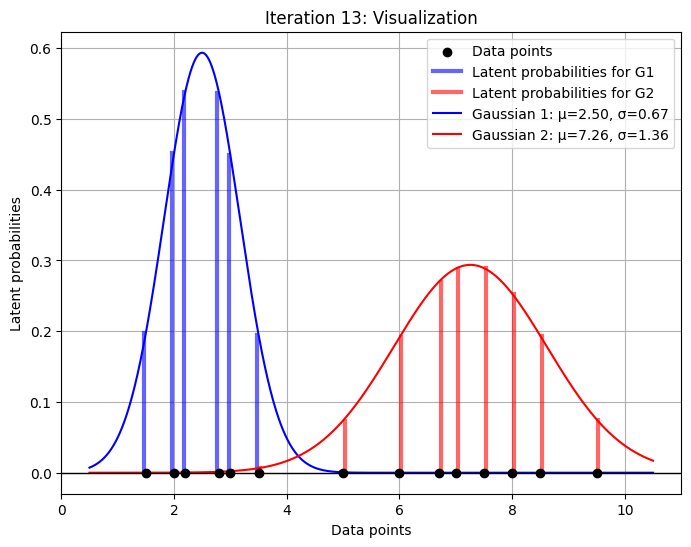

In [4]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Generate synthetic data from two Gaussian distributions
data = np.array([1.5, 2.0, 2.2, 2.8, 3.0, 3.5,5, 6, 6.7, 7.0, 7.5, 8.0, 8.5, 9.5])  # 10 data points

# Initial guesses for the means and standard deviations
mu = [1.0, 1.0]  # Initial means for the two Gaussians
sigma = [0.5, 1.0]  # Initial standard deviations for the two Gaussians

# Number of iterations
iterations = 13

# Define a function to visualize data on a graph with latent_probabilities
def plot_latent_probabilities(data, latent_probabilities, mu, sigma, iteration):
    plt.figure(figsize=(8, 6))

    # Plot data points as dots
    plt.scatter(data, np.zeros_like(data), c='black', zorder=3, label='Data points')

    # Plot latent_probabilities as vertical lines
    for i in range(len(data)):
        plt.plot([data[i]-0.03, data[i]-0.03], [0, latent_probabilities[i, 0]], color='blue', lw=3, alpha=0.6, label='Latent probabilities for G1' if i == 0 else "")
        plt.plot([data[i]+0.03, data[i]+0.03], [0, latent_probabilities[i, 1]], color='red', lw=3, alpha=0.6, label='Latent probabilities for G2' if i == 0 else "")

    # Plot the estimated Gaussian distributions
    x_vals = np.linspace(min(data)-1, max(data)+1, 1000)
    plt.plot(x_vals, norm.pdf(x_vals, mu[0], sigma[0]), color='blue', label=f'Gaussian 1: μ={mu[0]:.2f}, σ={sigma[0]:.2f}')
    plt.plot(x_vals, norm.pdf(x_vals, mu[1], sigma[1]), color='red', label=f'Gaussian 2: μ={mu[1]:.2f}, σ={sigma[1]:.2f}')

    plt.axhline(0, color='black', lw=1)
    plt.title(f"Iteration {iteration}: Visualization")
    plt.xlabel('Data points')
    plt.ylabel('Latent probabilities')
    plt.legend()
    plt.grid(True)
    plt.show()


# E-step: Calculate the Latent probabilities (posterior probability) for each data point
# Expectation-Maximization algorithm without mixing coefficients
for it in range(iterations):
    # E-step: Calculate the Latent probabilities (posterior probability) for each data point
    latent_probabilities = np.zeros((len(data), 2))  # latent_probabilities for 2 Gaussians

    # Calculate likelihood for each Gaussian
    for j in range(2):
        latent_probabilities[:, j] = norm.pdf(data, mu[j], sigma[j])
    plot_latent_probabilities(data, latent_probabilities, mu, sigma, it + 1)

    # Normalize latent_probabilities (sum of probabilities should be 1 for each point)
    sum_latent_probabilities = latent_probabilities.sum(axis=1)
    latent_probabilities = latent_probabilities / sum_latent_probabilities[:, np.newaxis]


    # M-step: Update the means and variances based on current latent_probabilities
    N1 = latent_probabilities[:, 0].sum()
    N2 = latent_probabilities[:, 1].sum()

    # Update the means
    mu[0] = (latent_probabilities[:, 0] @ data) / N1
    mu[1] = (latent_probabilities[:, 1] @ data) / N2

    # Update the variances
    sigma[0] = np.sqrt((latent_probabilities[:, 0] @ (data - mu[0])**2) / N1)
    sigma[1] = np.sqrt((latent_probabilities[:, 1] @ (data - mu[1])**2) / N2)
    # Visualize data and latent_probabilities on a graph
    #plot_latent_probabilities(data, latent_probabilities, mu, sigma, it + 1)





                                                    **Why Gradient Descent Cannot Solve This Problem and the Importance of EM**

Gradient descent cannot be used effectively to solve the problem of fitting Gaussian Mixture Models (GMMs) due to the **incomplete information** we have about which data point belongs to which Gaussian distribution. In GMM, each data point is generated by one of the multiple Gaussian distributions, but this "latent" information is hidden (i.e., we don't know which distribution generated each point). 

Gradient descent works well when we can compute gradients of a known, differentiable objective function, but in this case, the objective function (log-likelihood) is a mixture of distributions and involves hidden variables, making it difficult to differentiate directly with respect to the parameters. Moreover, the latent nature of the problem introduces multiple local optima, and without knowing which distribution generated which point, gradient descent struggles to find a meaningful global solution.

This is where the **Expectation-Maximization (EM)** algorithm becomes crucial. EM iteratively estimates both the hidden variables (which Gaussian each point belongs to) and the parameters (means and variances) of the distributions, gradually improving the model by alternately assigning probabilities and updating the parameters. It breaks the problem into two steps: the **E-step**, which estimates the probabilities of each data point belonging to each Gaussian (latent probabilities), and the **M-step**, which maximizes the likelihood of the data by updating the model parameters. This structured approach allows EM to handle the complexity of mixture models where standard optimization techniques like gradient descent fail.

EM is widely applicable in **clustering**, **image processing**, **speech recognition**, and **missing data estimation**. It is particularly valuable in any context where we deal with **latent variables**—those that are not observed directly but are inferred from the observed data, such as when multiple probabilistic processes generate the data.